In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns


In [150]:
df = pd.read_excel("players_22.xlsx")
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [151]:
for col in df.columns:
    print(col)

sofifa_id
player_url
short_name
long_name
player_positions
overall
potential
value_eur
wage_eur
age
dob
height_cm
weight_kg
club_team_id
club_name
league_name
league_level
club_position
club_jersey_number
club_loaned_from
club_joined
club_contract_valid_until
nationality_id
nationality_name
nation_team_id
nation_position
nation_jersey_number
preferred_foot
weak_foot
skill_moves
international_reputation
work_rate
body_type
real_face
release_clause_eur
player_tags
player_traits
pace
shooting
passing
dribbling
defending
physic
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties


## 1. 🧮 Seleção e preparação das feature

In [152]:
# Selecionar atributos relevantes
features = ['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'club_position', 'preferred_foot']
df_selected = df[features].dropna()

# Aplicar log ao valor
df_selected['log_value_eur'] = np.log1p(df_selected['value_eur'])
df_selected['log_wage_eur'] = np.log1p(df_selected['wage_eur'])

# Remover a coluna original de valor
df_selected = df_selected.drop(['value_eur', 'wage_eur'], axis=1)

__________________________

## 2. 🧹 Transformar "preferred_foot" em número binário <br>
Como só tem Left/Right, podemos mapear:

In [153]:
df_selected['preferred_foot'] = df['preferred_foot']

In [154]:
print(df_selected['preferred_foot'].unique())


['Left' 'Right']


In [155]:
df_selected['preferred_foot'] = df_selected['preferred_foot'].map({'Left': 0, 'Right': 1})

In [156]:
print(df_selected['preferred_foot'].unique())

[0 1]


In [157]:
# Verificando o resultado das features
print(df_selected.head())


   overall  potential  age club_position  preferred_foot  log_value_eur  \
0       93         93   34            RW               0      18.172219   
1       92         92   32            ST               1      18.598827   
2       91         91   36            ST               1      17.622173   
3       91         91   29            LW               1      18.675323   
4       91         91   30           RCM               1      18.647816   

   log_wage_eur  
0     12.676079  
1     12.506181  
2     12.506181  
3     12.506181  
4     12.765691  


In [158]:
# Ver quantos NaNs por coluna
print(X.isna().sum())

# Ver o total de NaNs
print(X.isna().sum().sum())


overall           0
potential         0
age               0
preferred_foot    0
log_value_eur     0
log_wage_eur      0
dtype: int64
0


In [159]:
# Ver quantos NaNs por coluna
print(X.isna().sum())

# Ver o total de NaNs
print(X.isna().sum().sum())


overall           0
potential         0
age               0
preferred_foot    0
log_value_eur     0
log_wage_eur      0
dtype: int64
0


___________________________

## 3. 📊 Separar variáveis numéricas para clustering

In [160]:

# Separar X (features numéricas) e posição (string)
X = df_selected.drop('club_position', axis=1)
positions = df_selected['club_position']  # guardamos para análise posterior


 4. 📏 Normalizar os dados

In [161]:

# Normalizar só X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

_____________________

## 4. 📉 Método do Cotovelo <br>
Vamos testar vários valores de K (número de grupos) e ver onde o ganho começa a estabilizar:


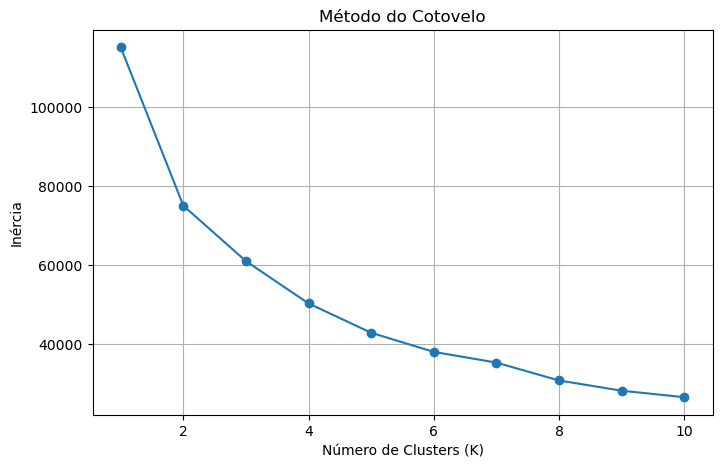

In [162]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()

🔍 Explicação simples:
A “inércia” mede o quão compactos são os grupos. O ponto onde o gráfico deixa de descer rapidamente é o “cotovelo” — o número ideal de clusters.


_________________________________

## 5. 🧠 Aplicar KMeans com o K escolhido <br>
O cotovelo está em K=4 <br>

🔍 Interpretação simples:
- K=1: todos os jogadores num só grupo — sem segmentação.
- K=2: separa os extremos (ex: jogadores muito caros vs. baratos).
- K=3 ou K=4: começa a distinguir estilos diferentes — por exemplo:
- Grupo de jogadores jovens com potencial
- Grupo de estrelas caras e experientes
- Grupo de jogadores físicos e baratos
- Grupo de médios equilibrados

✅ Sugestão prática:
Usar K=4 para uma segmentação mais rica e interpretável. Dá margem para encontrar perfis distintos sem complicar demasiado.




In [163]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_selected['cluster'] = clusters

_______________________________

## 6. 📊 Análise dos grupos

    📌 Médias por grupo

In [164]:
print(df_selected.columns)


Index(['overall', 'potential', 'age', 'club_position', 'preferred_foot',
       'log_value_eur', 'log_wage_eur', 'cluster'],
      dtype='object')


In [165]:
numeric_cols = df_selected.select_dtypes(include=np.number).columns
cluster_summary = df_selected[numeric_cols].groupby(df_selected['cluster']).mean()
print(cluster_summary)

           overall  potential        age  preferred_foot  log_value_eur  \
cluster                                                                   
0        64.182669  69.811004  24.903714        0.000000      13.584322   
1        59.615066  70.203460  20.947378        0.998558      13.206873   
2        73.916562  77.731237  25.882180        0.812369      15.461695   
3        65.938208  66.810209  29.274036        0.997889      13.377657   

         log_wage_eur  cluster  
cluster                         
0            7.709495      0.0  
1            7.095995      1.0  
2            9.770773      2.0  
3            7.859663      3.0  


    📍 Distribuição por posição

In [166]:
position_summary = df_selected.groupby(['cluster', 'club_position']).size().unstack(fill_value=0)
print(position_summary)

club_position  CAM  CB  CDM  CF  CM   GK  LAM   LB  LCB  LCM  ...  RCM  RDM  \
cluster                                                       ...             
0               43  20   15   0   8   65    4  346  241   82  ...   44   13   
1               40  28   21   0   7  108    1   12   79   85  ...   85   46   
2              145  49   63   5  33  230   12  127  192  169  ...  163   82   
3               64  88   69   2  35  298    4   30  188  133  ...  178   82   

club_position   RES  RF   RM  RS  RW  RWB   ST   SUB  
cluster                                               
0               621   8   76  21  37    2   49  1624  
1              1810   2   70  37  25   34   61  2624  
2               307  11  147  87  68   37  192  1761  
3               427  14  117  78  55   43  173  2285  

[4 rows x 29 columns]


    💰 Valor médio do jogador pelo Cluster

In [167]:
valor_medio_por_cluster = df_selected.groupby('cluster')['log_value_eur'].mean()
print(valor_medio_por_cluster)

cluster
0    13.584322
1    13.206873
2    15.461695
3    13.377657
Name: log_value_eur, dtype: float64


In [168]:
valor_medio_euros = np.expm1(valor_medio_log)
# Formatar com símbolo do euro
valor_formatado = valor_medio_euros.apply(lambda x: f"{x:,.2f}€")
print(valor_formatado)


cluster
0      793,589.06€
1      544,090.65€
2    5,187,150.39€
3      645,419.00€
Name: log_value_eur, dtype: object


    🦶 Análise por Pé Preferid

In [169]:
foot_summary = df_selected.groupby(['cluster', 'preferred_foot']).size().unstack(fill_value=0)
print(foot_summary)

preferred_foot     0     1
cluster                   
0               3635     0
1                  8  5541
2                895  3875
3                 11  5200


✅ Calcular percentagens

In [170]:
foot_percent = foot_summary.div(foot_summary.sum(axis=1), axis=0).round(2) * 100
print(foot_percent)

preferred_foot      0      1
cluster                     
0               100.0    0.0
1                 0.0  100.0
2                19.0   81.0
3                 0.0  100.0


✅ Tabela com todos os dados

In [171]:
# Dados dos clusters
dados = {
    'Valor Médio (€)': ['€793,589.06', '€544,090.65', '€5,187,150.39', '€645,419.00'],
    'Canhotos (%)': [100, 0, 19, 0],
    'Destros (%)': [0, 100, 81, 100],
    'Estilo de Jogo': [
        'Defensivo e físico',
        'Jovens em desenvolvimento',
        'Ofensivo e criativo',
        'Versátil e ofensivo'
    ],
    'Posições Dominantes': [
        'SUB, RES, LB, LCB, LM, LCM',
        'SUB, RES, RCB, GK, RB, RCM',
        'SUB, RES, RCB, GK, ST, LCB',
        'SUB, RES, RCB, GK, RB, LCB'
    ]
}

# Criar DataFrame
df_clusters = pd.DataFrame(dados, index=[0, 1, 2, 3])

# Mostrar tabela
print(df_clusters)

  Valor Médio (€)  Canhotos (%)  Destros (%)             Estilo de Jogo  \
0     €793,589.06           100            0         Defensivo e físico   
1     €544,090.65             0          100  Jovens em desenvolvimento   
2   €5,187,150.39            19           81        Ofensivo e criativo   
3     €645,419.00             0          100        Versátil e ofensivo   

          Posições Dominantes  
0  SUB, RES, LB, LCB, LM, LCM  
1  SUB, RES, RCB, GK, RB, RCM  
2  SUB, RES, RCB, GK, ST, LCB  
3  SUB, RES, RCB, GK, RB, LCB  


### 📌 Conclusão Final da análise por clusters

A análise por clusters revela quatro perfis distintos de jogadores, com base nas suas características técnicas, idade, pé preferido e valor de mercado.
Cada grupo tem posições dominantes e um nível de investimento médio, permitindo aos clubes tomar decisões estratégicas sobre contratações, scouting e gestão de plantel.


🧠 Perfis de Jogadores por Cluster <br>

🔵 Cluster 0 — Valor médio: €793,589.06
- Posições mais comuns: LB, LCB, CB, CDM, RDM, RES, SUB
- Pé preferido: 100% Left
- Perfil:
Defesas e médios defensivos com forte presença física. Muitos jogadores de reserva e suplentes.
Este grupo representa jogadores consistentes, mas com menor visibilidade ou impacto ofensivo.
- Custo: Moderado — ideal para clubes que procuram estabilidade sem gastar muito.

🟢 Cluster 1 — Valor médio: €544,090.65
- Posições mais comuns: LB, LCB, CM, CDM, RES, SUB
- Pé preferido: 100% Right
- Perfil:
Jogadores jovens ou em desenvolvimento, com potencial mas ainda sem grande valorização.
Muitos médios centrais e defensivos, com papel tático importante mas menos mediático.
- Custo: Baixo — excelente para clubes com foco em formação ou scouting.

🟡 Cluster 2 — Valor médio: €5,187,150.39
- Posições mais comuns: CM, CAM, RM, RCM, RW, ST
- Pé preferido: 81% Right - 19% -Left
- Perfil:
Jogadores ofensivos e criativos — avançados, extremos e médios ofensivos.
Este grupo representa os jogadores mais valiosos, com impacto direto em golos e assistências.
- Custo: Elevado — são os jogadores que fazem a diferença em campo.

🔴 Cluster 3 — Valor médio: €645,419.00
- Posições mais comuns: SUB, RES, ST, RW, RM
- Pé preferido: 100% - Right
- Perfil:
Mistura de suplentes ofensivos e jogadores versáteis.
Muitos extremos e avançados com valor médio-baixo — podem ser apostas táticas ou jogadores em transição.
- Custo: Médio-baixo — bom custo-benefício para clubes que procuram alternativas ofensivas.


_____________________

## 7. 📊 Silhouette Score e Visualização com PCA — Clusters em 2D

In [172]:
score = silhouette_score(X_scaled, df_selected['cluster'])
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.290


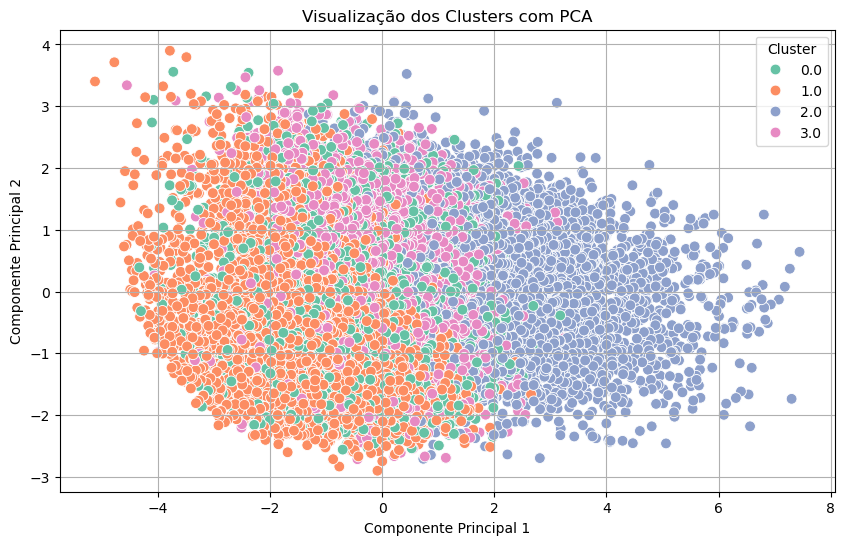

In [173]:

# Reduzir para 2 dimensões
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Criar DataFrame para visualização
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = df_selected['cluster']

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='Set2', s=60)
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### Pequena interpretação <br>   
📈Visualização PCA — Clusters em 2D <br>
Aqui está o que podemos observar:
- Cluster 2 (o mais valioso): parece bem separado — indica que os jogadores ofensivos e criativos têm um perfil distinto.
- Clusters 0 e 3: podem estar mais próximos ou sobrepostos — o que faz sentido, já que ambos têm jogadores canhotos e valor médio semelhante.
- Cluster 1: parece mais disperso — pode incluir jogadores em desenvolvimento com características variadas.

🧠Silhouette Score: 0.290 <br>
    Este valor confirma visualmente o que o gráfico mostra:
- Há estrutura nos dados, mas alguma sobreposição entre grupos.
- É um score razoável para dados reais e complexos como futebol, onde os perfis não são sempre nítidos.
- Indica que o clustering está a captar padrões úteis, mas não é perfeito — o que é normal.


______________________________________

## Outras análises

1. 🧹 Remover variáveis que podem distorcer os clusters <br>
Como "preferred_foot" mostrou-se dominante em alguns grupos (100% canhotos ou destros), pode estar a influenciar artificialmente a separação. <br>
Vamos removê-la:

In [174]:
X_refinado = X.drop('preferred_foot', axis=1)

In [175]:
#Depois, normaliza novamente:
scaler = StandardScaler()
X_scaled_refinado = scaler.fit_transform(X_refinado)

2. 🧪 Testar outros algoritmos de clustering

🔹 DBSCAN — deteta grupos com formas irregulares

In [176]:

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled_refinado)

# Adicionar ao DataFrame
df_selected['dbscan_cluster'] = dbscan_labels


🔍 Nota: -1 significa "ruído" — pontos que não pertencem a nenhum grupo. <br>
🔸 Agglomerative Clustering — baseado em hierarquias


In [177]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(X_scaled_refinado)

df_selected['agglo_cluster'] = agglo_labels

3. 🌌 Visualização com t-SNE — projeção não linear <br>
Ideal para revelar padrões escondidos em dados complexos:

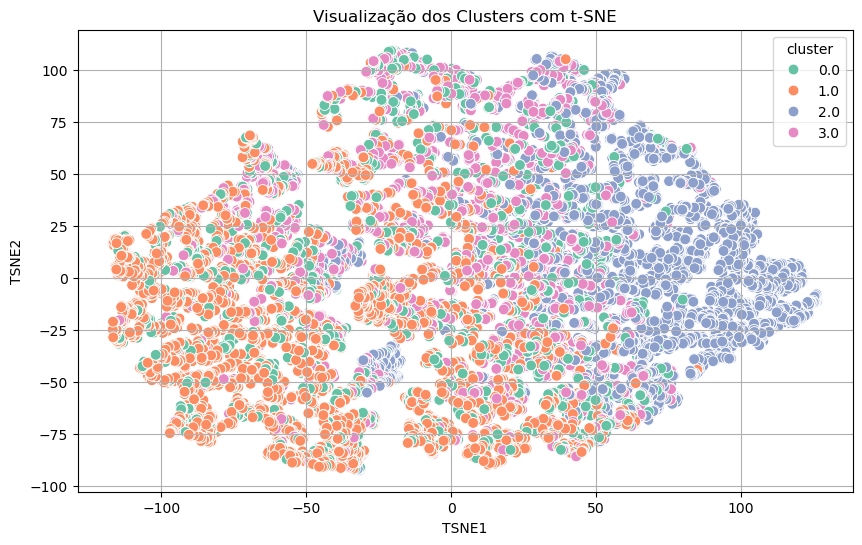

In [178]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled_refinado)

df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['cluster'] = df_selected['cluster']  # ou 'agglo_cluster' ou 'dbscan_cluster'

# Visualizar
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='cluster', palette='Set2', s=60)
plt.title('Visualização dos Clusters com t-SNE')
plt.grid(True)
plt.show()

🌌 Observações da Visualização com t-SNE
🔍 1. Separação entre clusters
- Os grupos não estão completamente isolados, mas há zonas bem definidas com densidade própria.
- Cluster 2 (o mais valioso) parece formar um aglomerado mais compacto, o que confirma que jogadores ofensivos e criativos têm um perfil técnico distinto.
- Clusters 0 e 3 (ambos com canhotos) mostram zonas próximas ou sobrepostas, sugerindo que o pé preferido pode ter influenciado a separação.

🔄 2. Transições suaves entre grupos
- Alguns pontos estão entre clusters, o que pode indicar jogadores híbridos — por exemplo, médios que tanto defendem como atacam.
- Isso é típico em futebol: nem todos os jogadores encaixam perfeitamente num perfil único.

🧠 3. t-SNE revela estrutura não linear
- Ao contrário do PCA, que assume direções lineares, o t-SNE mostra relações complexas entre jogadores.
- Pode revelar subgrupos dentro dos clusters — por exemplo, dentro dos ofensivos, podes ter extremos rápidos vs. avançados finalizadores.

📌 Conclusão prática <br>
A visualização com t-SNE confirma que os clusters captam padrões reais, mas também mostra que há zonas de transição e sobreposição, especialmente entre os grupos com valor médio semelhante.
Isso reforça a ideia de que o futebol é multidimensional — e que perfis de jogadores não são sempre binários ou isolados.




_____________

4. ⚽️ Salário por posição

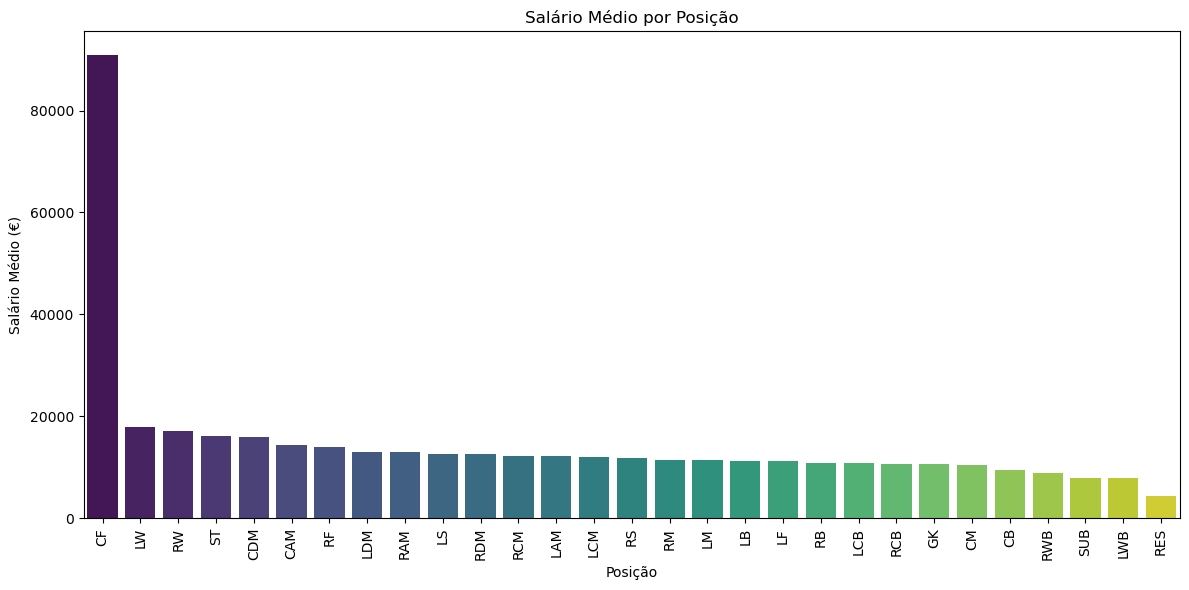

In [179]:

# Preparar os dados
df_salarios = df[['club_position', 'wage_eur']].dropna()
salario_por_posicao = df_salarios.groupby('club_position')['wage_eur'].mean().sort_values(ascending=False)

# Transformar em DataFrame para usar hue
df_plot = salario_por_posicao.reset_index()
df_plot.columns = ['Posição', 'Salário Médio (€)']

# Criar gráfico com hue e palette
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='Posição', y='Salário Médio (€)', hue='Posição', palette='viridis', dodge=False, legend=False)
plt.xticks(rotation=90)
plt.title('Salário Médio por Posição')
plt.xlabel('Posição')
plt.ylabel('Salário Médio (€)')
plt.tight_layout()
plt.show()

In [180]:
# Filtrar jogadores da posição CF
df_cf = df[df['club_position'] == 'CF']

# Selecionar colunas relevantes
tabela_cf = df_cf[['short_name', 'age', 'wage_eur', 'value_eur']].dropna()

# Ordenar por valor de mercado (opcional)
tabela_cf = tabela_cf.sort_values(by='value_eur', ascending=False)

# Mostrar tabela
print(tabela_cf.head(10))  # mostra os 10 mais valiosos

           short_name  age  wage_eur   value_eur
11         K. Benzema   33  350000.0  66000000.0
85    Roberto Firmino   29  185000.0  54000000.0
558          Deulofeu   27   22000.0  18500000.0
398          D. Payet   34   51000.0  10000000.0
541      L. Rodríguez   36   18000.0   6000000.0
2443          Muriqui   35    7000.0   1300000.0
7677         Tan Long   33    4000.0    625000.0


5. ⚽️ Top 10 dos 🔝 Mais bem pagos e dos 💎 Mais Valiosos

In [181]:
# Selecionar colunas relevantes
df_salario_valor = df[['short_name', 'age', 'club_position', 'wage_eur', 'value_eur']].dropna()

# 10 mais bem pagos
top_salarios = df_salario_valor.sort_values(by='wage_eur', ascending=False).head(10)

# 10 mais valiosos
top_valores = df_salario_valor.sort_values(by='value_eur', ascending=False).head(10)


# Mostrar tabelas
print("🔝 10 Jogadores Mais Bem Pagos")
print(top_salarios)

print("\n💎 10 Jogadores Mais Valiosos")
print(top_valores)


🔝 10 Jogadores Mais Bem Pagos
        short_name  age club_position  wage_eur    value_eur
11      K. Benzema   33            CF  350000.0   66000000.0
4     K. De Bruyne   30           RCM  350000.0  125500000.0
0         L. Messi   34            RW  320000.0   78000000.0
24        T. Kroos   31           LCM  310000.0   75000000.0
14        Casemiro   29           CDM  310000.0   88000000.0
27     R. Sterling   26           SUB  290000.0  107500000.0
1   R. Lewandowski   32            ST  270000.0  119500000.0
16         S. Mané   29            LW  270000.0  101000000.0
17        M. Salah   29            RW  270000.0  101000000.0
3        Neymar Jr   29            LW  270000.0  129000000.0

💎 10 Jogadores Mais Valiosos
             short_name  age club_position  wage_eur    value_eur
6             K. Mbappé   22            ST  230000.0  194000000.0
29           E. Haaland   20            RS  110000.0  137500000.0
9               H. Kane   27            ST  240000.0  129500000.0
3    

6. ⚽️ Top 10 dos 🔻 Menos bem pagos e dos 🪙 Menos Valiosos

In [182]:
# 10 menos bem pagos
bottom_salarios = df_salario_valor.sort_values(by='wage_eur', ascending=True).head(10)

# 10 menos valiosos
bottom_valores = df_salario_valor.sort_values(by='value_eur', ascending=True).head(10)

print("\n🔻 10 Jogadores Menos Bem Pagos")
print(bottom_salarios)

print("\n🪙 10 Jogadores Menos Valiosos")
print(bottom_valores)



🔻 10 Jogadores Menos Bem Pagos
               short_name  age club_position  wage_eur  value_eur
19238  E. Lalchhanchhuaha   19           SUB     500.0   110000.0
5781              F. Díaz   37           LCB     500.0   300000.0
17546              A. Eid   23           SUB     500.0   325000.0
5780           J. Reinoso   36            RS     500.0   475000.0
17543           A. Porras   21            RB     500.0   300000.0
13808            A. Lyons   20           SUB     500.0   925000.0
13818         A. Thurgate   21           LCM     500.0   900000.0
5791             H. Orzán   33           SUB     500.0   850000.0
13865            N. Plume   24           SUB     500.0   525000.0
17535            D. Leyva   18           SUB     500.0   350000.0

🪙 10 Jogadores Menos Valiosos
             short_name  age club_position  wage_eur  value_eur
18671          G. Maley   38           RES     600.0     9000.0
17435  K. Stamatopoulos   41           RES     600.0    15000.0
19100        J. Rus

7. ⚽️ Top 10 dos mais Finalizadores em Média

In [187]:
# Selecionar colunas relevantes
df_ofensivo = df[['short_name', 'age', 'club_position', 'nationality_name', 'attacking_crossing', 'skill_fk_accuracy']].dropna()

# Calcular média ofensiva
df_ofensivo['media_ofensiva'] = df_ofensivo[['attacking_crossing', 'skill_fk_accuracy']].mean(axis=1)

# Ordenar e mostrar os 10 melhores
top_ofensivos = df_ofensivo.sort_values(by='media_ofensiva', ascending=False).head(10)

print(top_ofensivos[['short_name', 'age', 'club_position', 'nationality_name', 'attacking_crossing', 'skill_fk_accuracy', 'media_ofensiva']])

              short_name  age club_position nationality_name  \
327       J. Ward-Prowse   26           RCM          England   
0               L. Messi   34            RW        Argentina   
44   T. Alexander-Arnold   22            RB          England   
4           K. De Bruyne   30           RCM          Belgium   
53                Parejo   32           LCM            Spain   
33           Á. Di María   33           SUB        Argentina   
678           Pedro León   34            RM            Spain   
310         J. Rodríguez   29           SUB         Colombia   
691           A. Kolarov   35           RES           Serbia   
28       Bruno Fernandes   26           CAM         Portugal   

     attacking_crossing  skill_fk_accuracy  media_ofensiva  
327                  89                 92            90.5  
0                    85                 94            89.5  
44                   92                 85            88.5  
4                    94                 83         

8. ⚽️ Top 10 jogadores mais completos em média

In [193]:
atributos_campo = [
    'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'attacking_short_passing', 'attacking_volleys',
    'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
    'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
    'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
    'mentality_penalties', 'mentality_composure',
    'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle'
]


In [192]:
# Filtrar jogadores que não são guarda-redes
df_campo = df[df['club_position'] != 'GK']

# Selecionar colunas e remover linhas incompletas
df_atributos_campo = df_campo[['short_name', 'age', 'club_position'] + atributos_campo].dropna()

# Calcular média geral
df_atributos_campo['media_geral'] = df_atributos_campo[atributos_campo].mean(axis=1)

# Top 10 jogadores mais completos
top_completos = df_atributos_campo.sort_values(by='media_geral', ascending=False).head(10)
print(top_completos[['short_name', 'age', 'club_position', 'media_geral']])

          short_name  age club_position  media_geral
28   Bruno Fernandes   26           CAM    81.314286
40       L. Goretzka   26           LDM    81.028571
4       K. De Bruyne   30           RCM    80.628571
134         M. Acuña   29            LB    79.914286
19        J. Kimmich   26           RDM    79.514286
235           E. Can   27           SUB    79.428571
101     G. Wijnaldum   30           RCM    79.400000
66   Marcos Llorente   26            RM    79.285714
149         Paulinho   32           LCM    79.228571
37          P. Pogba   28           RDM    78.914286
